In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, groupby
from collections import OrderedDict
from scipy.stats import ttest_ind
from pprint import pprint

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# os.chdir(r'C:\Users\VartanianAS\Documents\Python\jupyter_projects\project_2')
os.chdir(r'C:\Users\Artyom\jupyter_projects\skillfactory\project_2')
students = pd.read_csv('stud_math.csv')

# Цель проекта

Провести разведывательный анализ данных, и определить влияние разных признаков на результат госэкзамена по математике

# Дополнительные данные

### Функции

In [3]:
def fast_analyse_pie(df, axes_size, figsize, students_legent, columns_with_two_values, pie_plot=False):
    """
    Создаёт subplots с указанной размерностью и отображает на них информацию графики
    типа pie для данных с двумя уникальными значениями
    """
    fig, axes = plt.subplots(*axes_size, figsize=figsize)
    index = 0

    for i in range(axes_size[0]):
        for j in range(axes_size[1]):
            try:
                column = columns_with_two_values[index]
                axes_dict = OrderedDict(
                    df[columns_with_two_values[index]].value_counts())
                axes[i, j].pie(axes_dict.values())
                axes[i, j].legend(axes_dict.keys(), loc=1)
                axes[i, j].set_title(students_legent[column])
                index += 1
            except IndexError:
                break

In [4]:
def fast_analyse_hist(df, axes_size, figsize, student_legent, columns_with_two_values, object_type=False):
    """
    Создаёт subplots с указанной размерностью и отображает гистограммы. Может отображать гистограммы
    либо для типов данных object, либо для числовых
    """
    fig, axes = plt.subplots(*axes_size, figsize=figsize)
    indexes = [0, 0]

    if object_type:
        for column in df.columns:
            if column in columns_with_two_values:
                continue
            if df[column].dtype != 'object':
                continue
            else:
                col_series = df[column].value_counts()
                x = list(col_series.keys())
                y = list(col_series.values)
                axes[indexes[0], indexes[1]].bar(x, y, width=0.8)
                axes[indexes[0], indexes[1]].set_title(students_legent[column])
                if (indexes[1] < 1):
                    indexes[1] += 1
                else:
                    indexes[1] = 0
                    indexes[0] += 1
    else:
        for column in df.columns:
            if column in columns_with_two_values:
                continue
            elif students[column].dtype == 'object':
                continue
            col_series = df[column].value_counts()
            x = list(col_series.keys())
            y = list(col_series.values)
            axes[indexes[0], indexes[1]].bar(x, y, width=0.8)
            axes[indexes[0], indexes[1]].set_title(column)
            if (indexes[1] < 3):
                indexes[1] += 1
            else:
                indexes[1] = 0
                indexes[0] += 1

In [5]:
def get_boxplot(df, column, y_data, figsize=(14, 4)):
    """
    Создаёт подряд boxplots с указанной размерностью для указанных данных и с указанной осью y
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(x=column, y=y_data,
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

### Объекты

In [6]:
# Словарь содержит описания столбцов для легенды на графиках
students_legent = {
    'school': 'Аббревиатура школы',
    'sex': 'Пол ученика',
    'age': 'Возраст ученика',
    'address': 'Тип адреса ученика \n(U - городской, R - за городом)',
    'famsize': 'Размер семьи \n(LE3 <= 3, GT3 >3)',
    'Pstatus': 'Статус совместного жилья родителей \n(T - живут вместе A - раздельно)',
    'Medu': 'Образование матери \n(0 - нет, 1 - 4 класса, 2 - 5-9 классы, \n3 - среднее специальное или 11 классов, \n4 - высшее)',
    'Fedu': 'Образование отца \n(0 - нет, 1 - 4 класса, 2 - 5-9 классы, \n3 - среднее специальное или 11 классов, \n4 - высшее)',
    'Mjob': 'Работа матери',
    'Fjob': 'Работа отца',
    'reason': 'Причина выбора школы \n(home - близость к дому, reputation - репутация школы, \ncourse - образовательная программа, other - другое)',
    'guardian': 'Опекун',
    'traveltime': 'Время в пути до школы \n(1 - <15 мин., 2 - 15-30 мин., \n3 - 30-60 мин., 4 - >60 мин.)',
    'studytime': 'Время на учёбу помимо школы в неделю \n(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)',
    'failures': 'Количество внеучебных неудач \n(n, если 1<=n<3, иначе 0)',
    'schoolsup': 'Дополнительная образовательная \nподдержка',
    'famsup': 'Семейная образовательная \nподдержка',
    'paid': 'Дополнительные платные \nзанятия по математике',
    'activities': 'Дополнительные внеучебные \nзанятия',
    'nursery': 'Посещал детский сад',
    'higher': 'Хочет получить высшее \nобразование',
    'internet': 'Наличие интернета \nдома',
    'romantic': 'В романтических отношениях',
    'famrel': 'Семейные отношения \n(от 1 до 5 баллов)',
    'freetime': 'Свободное время \nпосле школы \n(от 1 до 5 баллов)',
    'goout': 'Проведение времени с друзьями \n(от 1 до 5 баллов)',
    'health': 'Текущее состояние здоровья \n(от 1 до 5 баллов)',
    'absences': 'Количество пропущенных занятий',
    'score': 'Баллы по госэкзамену по \nматематике',
}

# Решение

### Осмотр данных

Выведем предварительную информацию по датасету:
 - первые 15 позиций;
 - общую информацию по датасету
 - количество уникальных значений и наличие пустых ячеек в столбцах 

In [7]:
display(students.head(15))
display(students.info())
print('Уникальные и пустые значения в столбца:')
for col in students.columns:
    null_counts = '+ пустые ячейки' if students[col].isna(
    ).sum() else 'без пустых ячеек'
    print(' - {col}: {value} {null_counts}'.format(col=col,
                                                   value=students[col].nunique(), null_counts=null_counts))
print('\n')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

None

Уникальные и пустые значения в столбца:
 - school: 2 без пустых ячеек
 - sex: 2 без пустых ячеек
 - age: 8 без пустых ячеек
 - address: 2 + пустые ячейки
 - famsize: 2 + пустые ячейки
 - Pstatus: 2 + пустые ячейки
 - Medu: 5 + пустые ячейки
 - Fedu: 6 + пустые ячейки
 - Mjob: 5 + пустые ячейки
 - Fjob: 5 + пустые ячейки
 - reason: 4 + пустые ячейки
 - guardian: 3 + пустые ячейки
 - traveltime: 4 + пустые ячейки
 - studytime: 4 + пустые ячейки
 - failures: 4 + пустые ячейки
 - schoolsup: 2 + пустые ячейки
 - famsup: 2 + пустые ячейки
 - paid: 2 + пустые ячейки
 - activities: 2 + пустые ячейки
 - nursery: 2 + пустые ячейки
 - studytime, granular: 4 + пустые ячейки
 - higher: 2 + пустые ячейки
 - internet: 2 + пустые ячейки
 - romantic: 2 + пустые ячейки
 - famrel: 6 + пустые ячейки
 - freetime: 5 + пустые ячейки
 - goout: 5 + пустые ячейки
 - health: 5 + пустые ячейки
 - absences: 36 + пустые ячейки
 - score: 18 + пустые ячейки




### Первичная обработка

Наименания столбцов можно не изменять. Также в датасете обнаружен столбец "studytime, granular", не указанный в описании датасета. На первый взгляд, судя по отображенной информации о количестве непустых уникальных значений, он идентичен столбцу с похожим названием "studytime". Сравним эти столбцы.

C:\Users\Artyom\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Artyom\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 27.,   0.,   0.,  64.,   0.,   0., 194.,   0.,   0., 103.]),
 array([-12. , -11.1, -10.2,  -9.3,  -8.4,  -7.5,  -6.6,  -5.7,  -4.8,
         -3.9,  -3. ]),
 <a list of 10 Patch objects>)

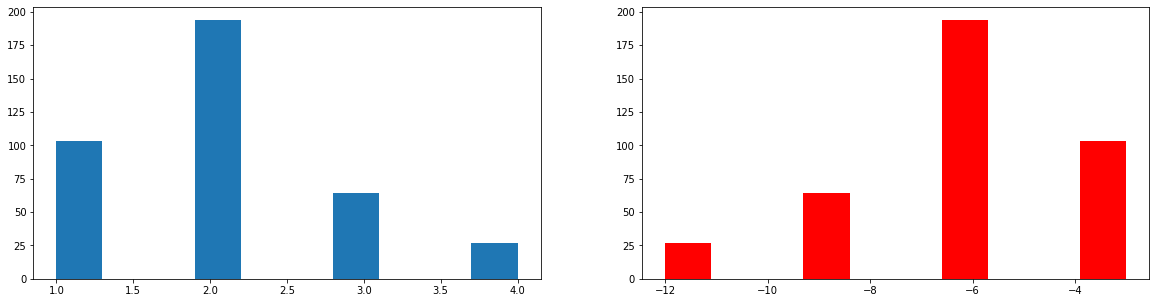

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].hist(students['studytime'])
axes[1].hist(students['studytime, granular'], color='red')

Можно наглядно заметить, что столбцы отражают идентичную информацию под разными значениями, следовательно - лишний столбец можно удалить

In [9]:
del students['studytime, granular']

В датасете присутствует множество значений с двумя текстовыми уникальными значениями. Для наглядности, составим их список и используем специальную написанную функцию, чтобы наглядно увидеть информацию по ним в виде круговых диаграмм.

In [10]:
# Полученим список столбцов с двумя значениями
columns_with_two_values = []
for column in students.columns:
    if len(students[column].value_counts()) == 2:
        columns_with_two_values.append(column)

In [11]:
pprint(columns_with_two_values)
pprint(len(columns_with_two_values))

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']
13


### Наглядное представление данных

В датасете присутствует множество столбцов со всего двумя уникальными значениями. В таком случае для визуального представления этих данных можно воспользоваться круговыми диаграммами. Также, т.к. уникальных значений мало, на диаграммах можно отобразить дополнительно и пустые значения

In [12]:
# Для удобства, заменим все пустые значений на 'no_info' для наглядности, скопировав датасет
students_copy = students.copy(deep=True)
students_copy = students.fillna('no_info')

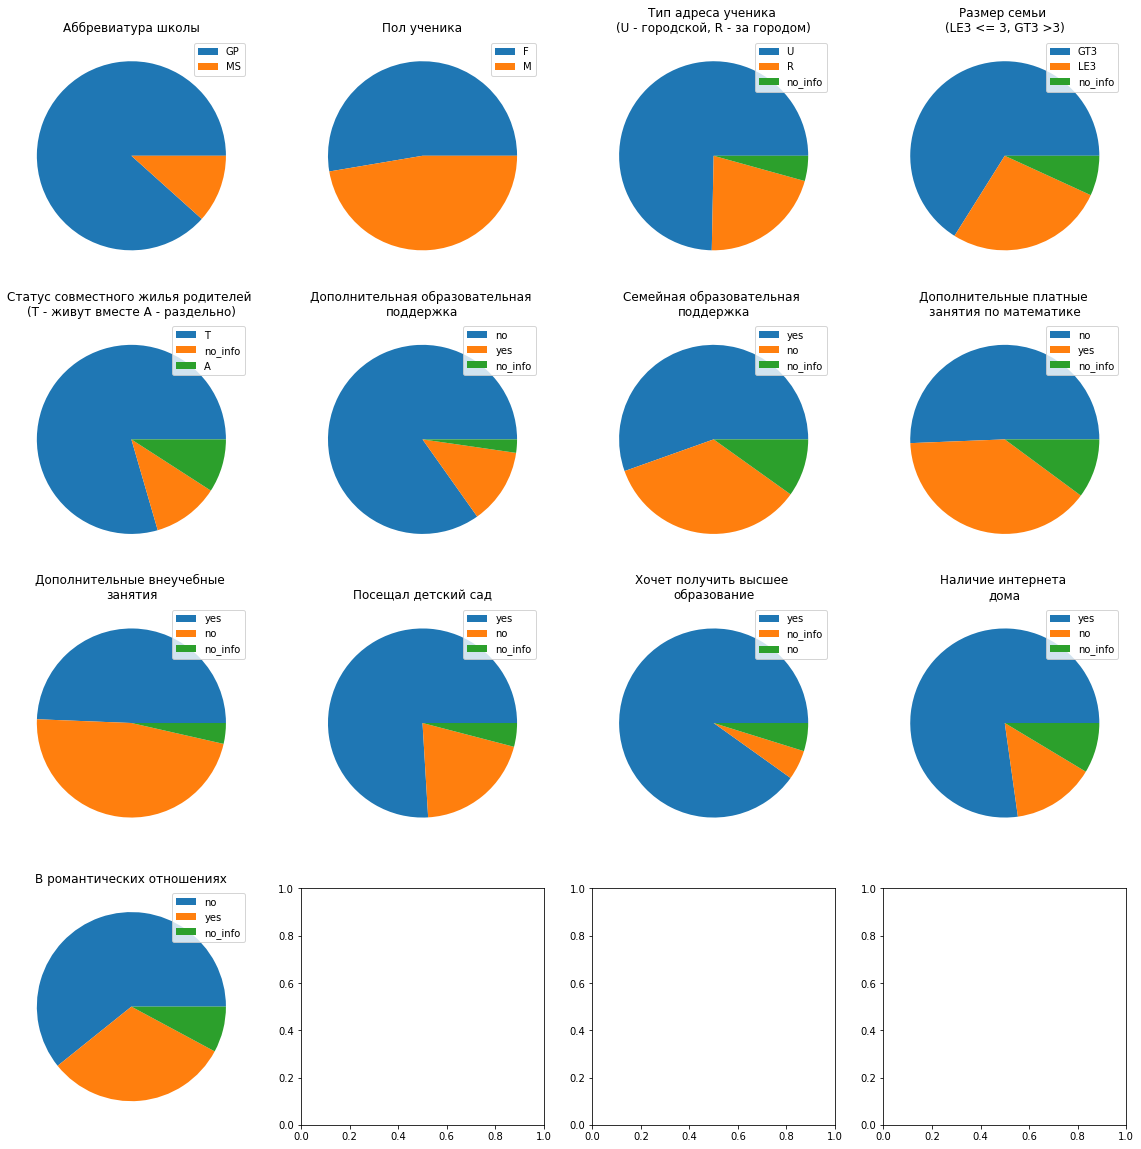

In [13]:
fast_analyse_pie(students_copy, [4, 4], [20, 20],
                 students_legent, columns_with_two_values)

Как видно из диаграмм, не считая столбцов "Пол" и "Аббревиатура школы", ...

Все остальные столбцы можно представить для начала наглядно в виде гистограм для выявления в них наличия выбросов

Для начала проверяем столбцы с категориальным типом данных на наличие пустых, или других каких-нибудь некорректных данных

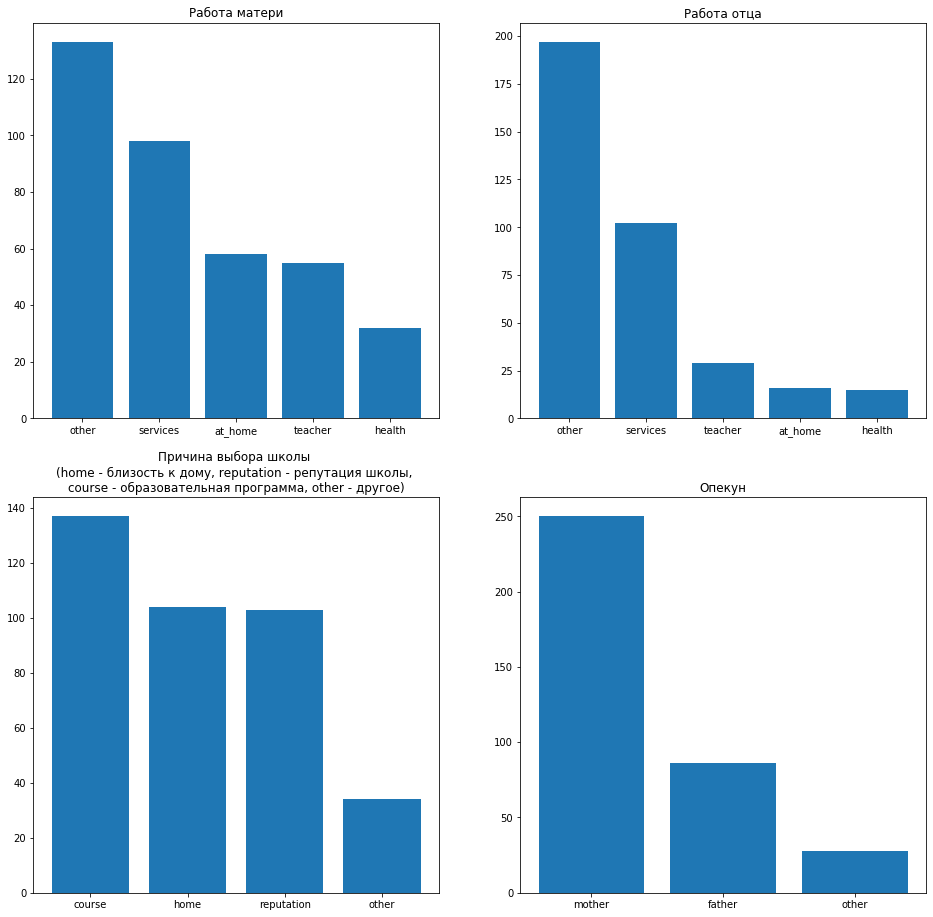

In [14]:
fast_analyse_hist(students, [2, 2], 
                  [16, 16], students_legent, columns_with_two_values, object_type=True)

Следующим шагом можно проверить все столбцы с числовым типом данных.

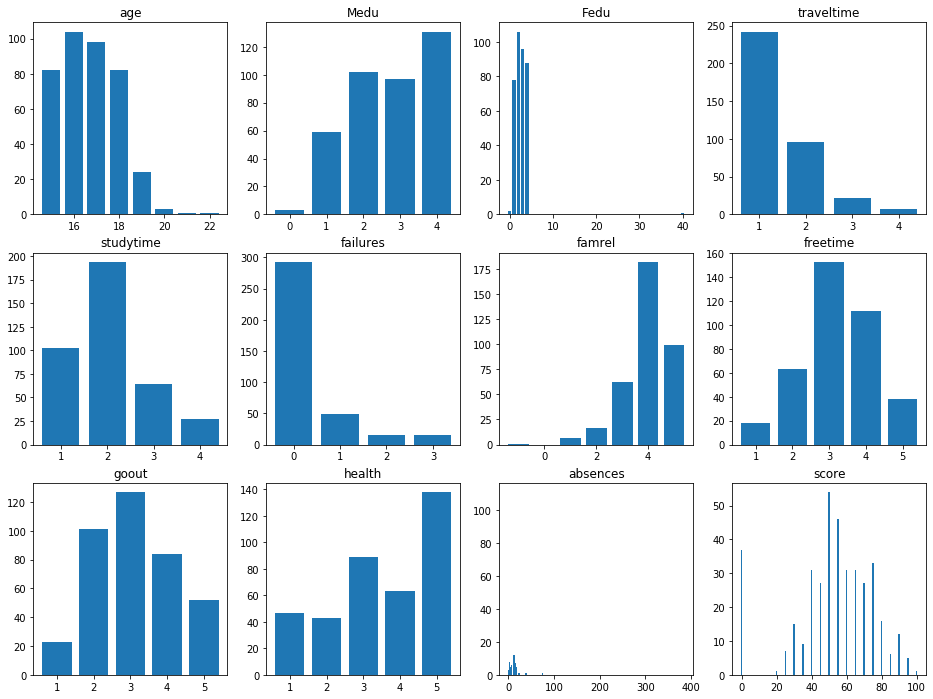

In [15]:
fast_analyse_hist(students, [3, 4], [16, 12], students_legent,
                  columns_with_two_values, object_type=False)

### Устранение выбросов

Сразу методами использования здравого смысла (учитывая, что в столбцах ), по диаграммам можно заметить выбросы в следующих столбцах:
 - Fedu
 - famrel
 - absences

В одну строку преобразуем датасет, убрав выбросы в указанных столбцах

In [16]:
students = students.loc[(students['Fedu'] <= 4) & (
    students['famrel'] > 0) & (students['absences'] < 100)]

Ещё раз проверим данные

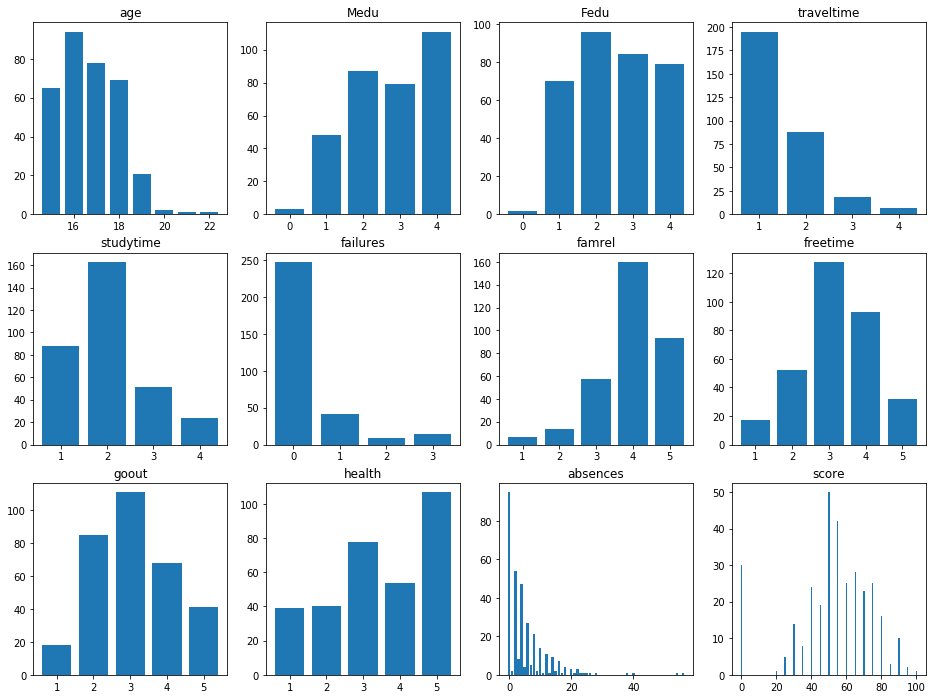

In [17]:
fast_analyse_hist(students, [3, 4], [16, 12], students_legent,
                  columns_with_two_values, object_type=False)

Так же можно увидеть, что в датасете отдельно выделяются ученики, которые получили за экзамен 0. Для удобства можно создать столбец, который отдельно указывает, что результат за экзамен не нулевой

In [18]:
students['very_bad_score'] = students['score'].apply(lambda x: bool(x))

### Корреляционный анализ

Для наглядности результатов корреляционного анализа, дополнительно представим их в виде тепловой карты

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,very_bad_score
age,1.000000,-0.156230,-0.168238,0.071708,-0.019213,0.223545,0.053071,0.011246,0.081128,-0.071476,0.150496,-0.140704,-0.073385
Medu,-0.156230,1.000000,0.649339,-0.183575,0.079136,-0.227670,-0.037540,-0.007904,0.065083,-0.086337,0.122147,0.196428,0.105797
Fedu,-0.168238,0.649339,1.000000,-0.190456,-0.005535,-0.259644,-0.041272,-0.030685,0.018502,0.008007,0.070776,0.114783,0.040833
traveltime,0.071708,-0.183575,-0.190456,1.000000,-0.120655,0.079594,-0.056083,0.008059,0.015462,-0.018394,-0.052200,-0.066046,-0.013037
studytime,-0.019213,0.079136,-0.005535,-0.120655,1.000000,-0.138769,0.021930,-0.129990,-0.060053,-0.090732,-0.055309,0.112442,0.025171
failures,0.223545,-0.227670,-0.259644,0.079594,-0.138769,1.000000,0.021821,0.114783,0.094840,0.054503,0.077784,-0.308892,-0.196346
famrel,0.053071,-0.037540,-0.041272,-0.056083,0.021930,0.021821,1.000000,0.167052,0.080827,0.101424,-0.034116,0.044338,0.021286
freetime,0.011246,-0.007904,-0.030685,0.008059,-0.129990,0.114783,0.167052,1.000000,0.288308,0.089649,-0.024020,0.016692,0.036634
goout,0.081128,0.065083,0.018502,0.015462,-0.060053,0.094840,0.080827,0.288308,1.000000,-0.020271,0.050191,-0.142237,-0.033629
health,-0.071476,-0.086337,0.008007,-0.018394,-0.090732,0.054503,0.101424,0.089649,-0.020271,1.000000,-0.055427,-0.040852,-0.026249


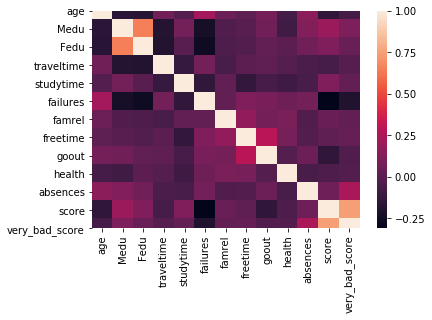

In [19]:
display(students.corr())
sns.heatmap(students.corr())

По результатам корреляционного анализа, можно уже выделить такие столбцы как <b>freetime</b>, <b>famrel</b>, <b>traveltime</b> и <b>health</b>, которые имеют слабый уровень корреляции с итоговым результатом экзамена. Кроме того, в глаза бросается прямая зависимость между столбцами <b>Fedu</b> и <b>Medu</b>, что немного говорит о брачных предпочтениях родителей учеников (также это ещё и говорит, о том, что у этих параметров не зря установлен численный тип, а не категориальный).

Также можно заметить, что столбец <b>absences</b>, несмотря на плохую корреляцию со <b>score</b>, неплохо коррелируют с последним столбцом <b>very_bad_score</b>. Это говорит нам о том, что следуте выполнить дополнительный корреляционный анализ с учётом отсуствия нулевых результатов экзамена

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,very_bad_score
age,1.000000,-0.145368,-0.150189,0.096017,-0.013045,0.267113,0.058573,-0.010205,0.086535,-0.059168,0.183344,-0.129530,NaN
Medu,-0.145368,1.000000,0.637641,-0.177563,0.068473,-0.204716,-0.030486,-0.025376,0.064106,-0.077385,0.105133,0.176149,NaN
Fedu,-0.150189,0.637641,1.000000,-0.194235,-0.027079,-0.273594,-0.033678,-0.040192,0.011548,0.006535,0.066094,0.127480,NaN
traveltime,0.096017,-0.177563,-0.194235,1.000000,-0.117883,0.121702,-0.047167,0.019876,0.026463,0.005119,-0.052822,-0.085483,NaN
studytime,-0.013045,0.068473,-0.027079,-0.117883,1.000000,-0.133744,0.037916,-0.122571,-0.044969,-0.108431,-0.066519,0.148863,NaN
failures,0.267113,-0.204716,-0.273594,0.121702,-0.133744,1.000000,0.035534,0.139481,0.117027,0.035989,0.142355,-0.262781,NaN
famrel,0.058573,-0.030486,-0.033678,-0.047167,0.037916,0.035534,1.000000,0.149042,0.044458,0.119378,-0.042897,0.047958,NaN
freetime,-0.010205,-0.025376,-0.040192,0.019876,-0.122571,0.139481,0.149042,1.000000,0.276138,0.105049,-0.035521,-0.012593,NaN
goout,0.086535,0.064106,0.011548,0.026463,-0.044969,0.117027,0.044458,0.276138,1.000000,-0.007076,0.063900,-0.183775,NaN
health,-0.059168,-0.077385,0.006535,0.005119,-0.108431,0.035989,0.119378,0.105049,-0.007076,1.000000,-0.052819,-0.033492,NaN


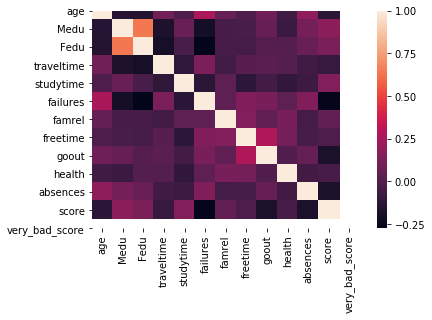

In [20]:
display(students[students['score'] != 0].corr())
sns.heatmap(students[students['score'] != 0].corr())

В результате видно увеличение обратной корреляции столбца <b>absences</b> со столбцом <b>score</b>.

<b><i>Можно сделать вывод, что среди численных столбцов наиболее негативное влияние на результаты экзамена оказывают столбцы "failures", "goout" (больше времени с друзьями - хуже экзамен), "absences" и немного "age" (те, кто постарше сдают немного хуже)</i></b>

## Анализ остальных значений через boxplot

Чтобы boxplot не вносил нулевой результат в число выбросов по параметрам межквартильного размаха, анализ будем проводит для данных без нулевого результата экзамена

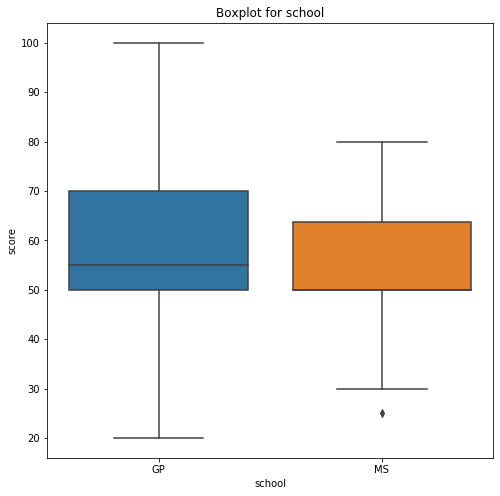

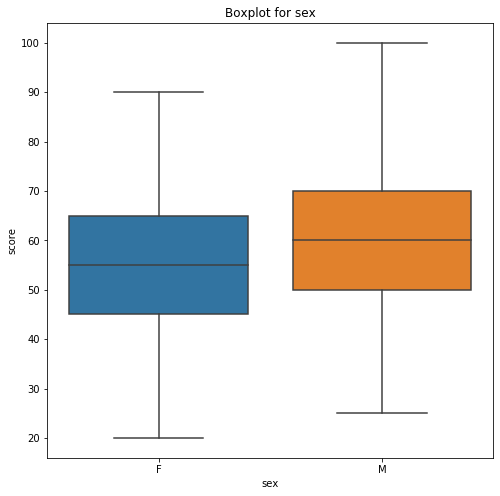

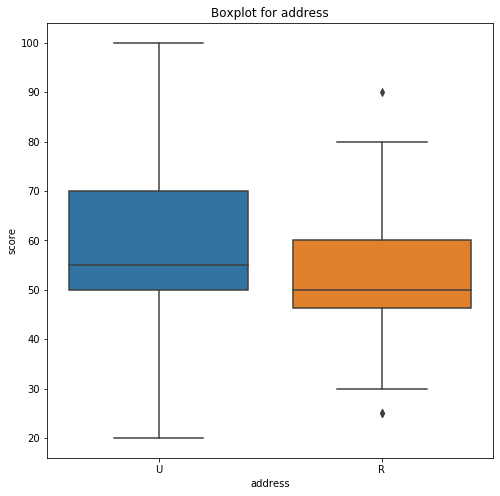

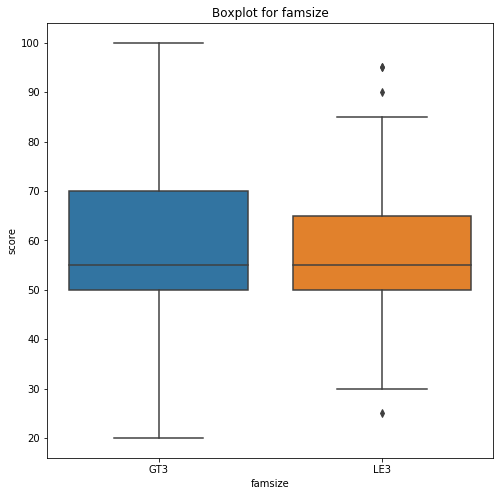

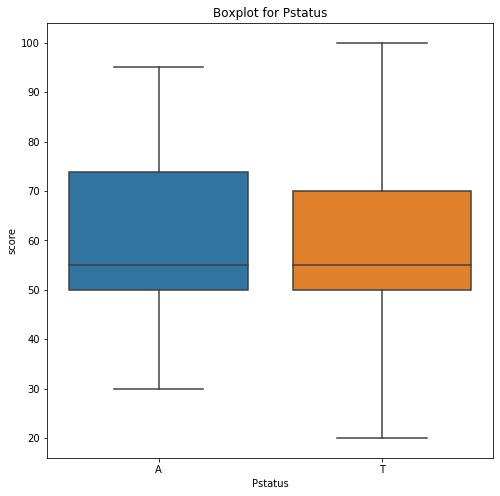

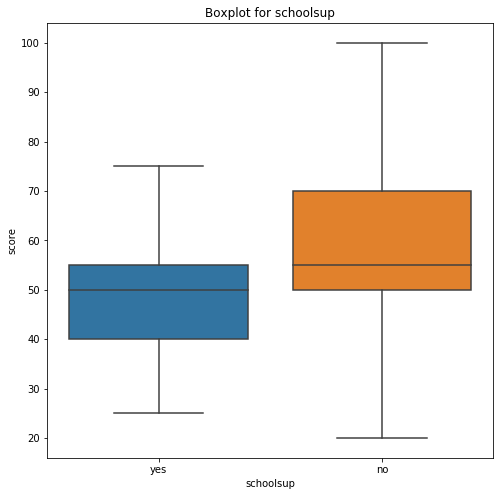

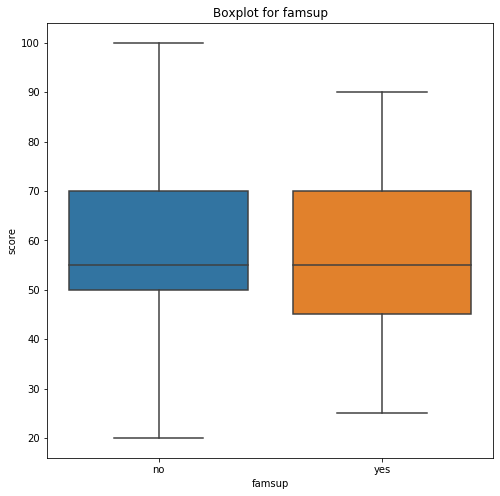

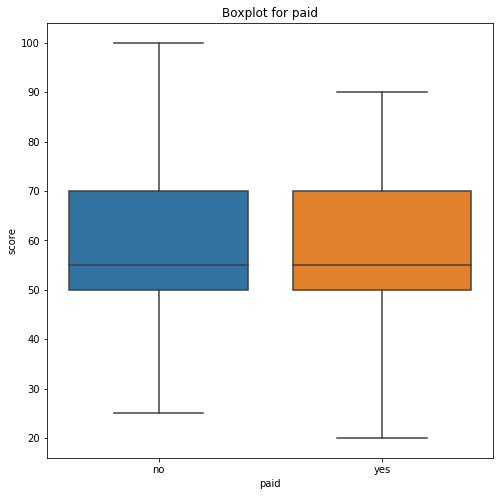

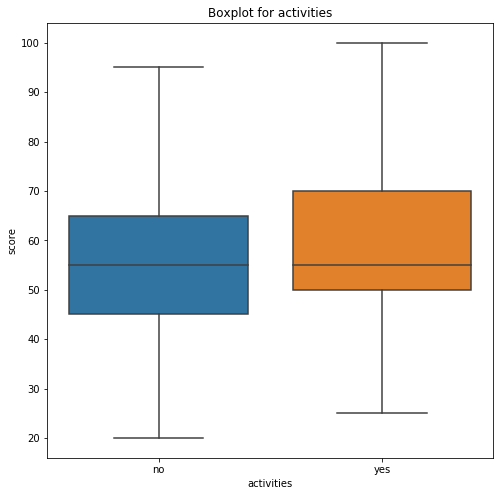

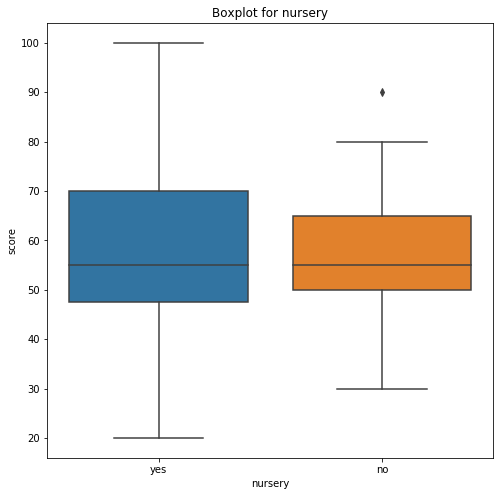

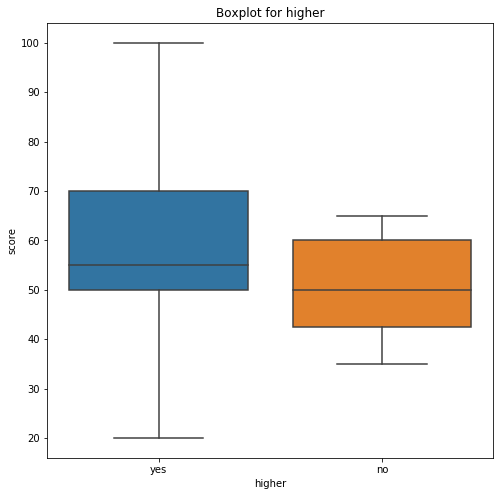

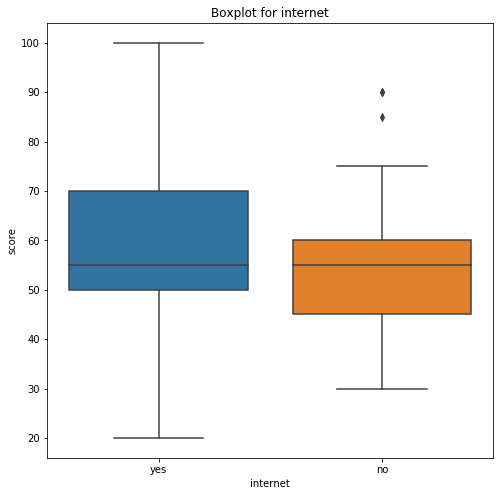

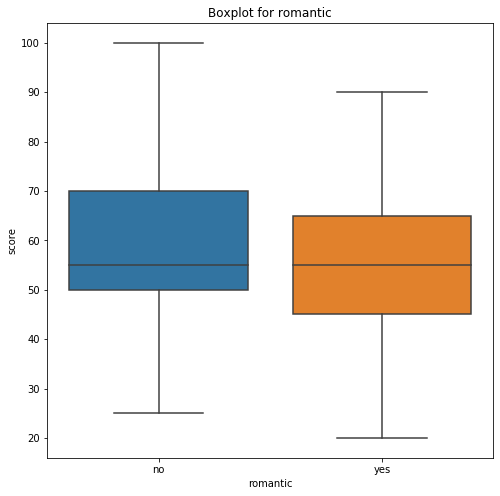

In [21]:
for col in columns_with_two_values:
    get_boxplot(students[students['score'] != 0], col, 'score', figsize=(8, 8))

В учёт не брались пустые значения. По итогу можно сказать, что большинство параметров тем или иным образом влияют на результат экзамена. Особенное влияние оказывают столцы "internet", "higher", "nursey", "schoolsup", "address" и "school"

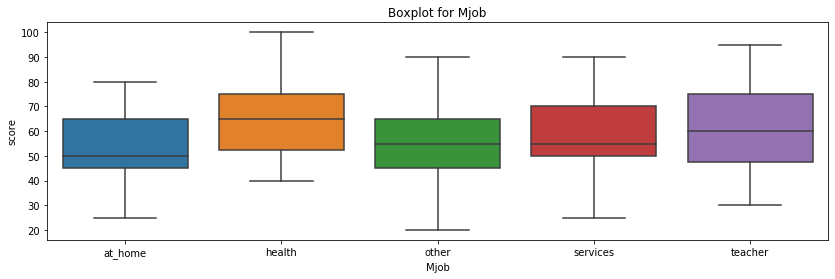

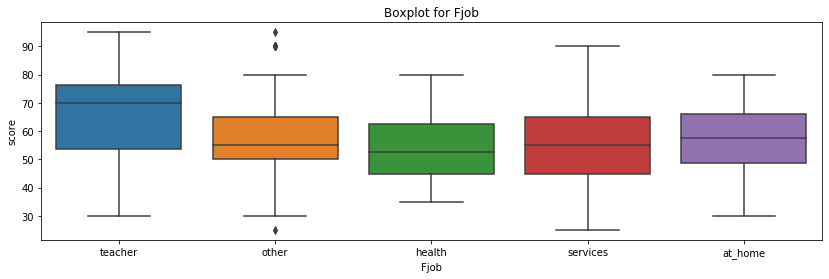

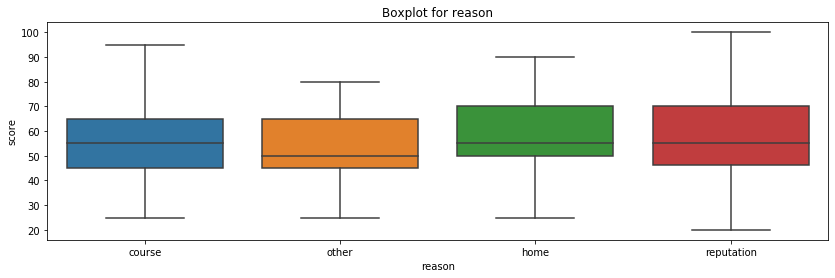

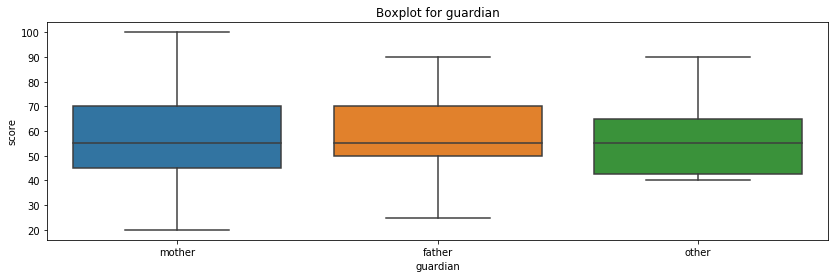

In [22]:
for col in students.columns:
    if (col in columns_with_two_values) | (students[col].dtype != 'object'):
        continue
    get_boxplot(students[students['score'] != 0],
                col, 'score', figsize=(14, 4))

Данные последних графиков указывают на то, что указанные столбцы особых воздействий на результат экзамена не оказывают (за исключением лишь того, что дети, чьи родители - учителя, сдают экзамен в среднем лучше, но ненамного), следовательно, их можно удалить

In [23]:
for col in ['guardian', 'reason']:
    del students[col]

## Вывод

В ходе работы в датасет были внесены следующие изменения:
 - Удалены выбросы
 - Удалён лишний столбец "studytime, granular"
 - Добавлен столбец о нулевом балле за экзамен "very_bad_score"

На основе проведённого предварительного анализа, можно сделать следующие выводы:
 - В большинстве столбцов присутствуют нулевые значения
 - В датасете было немного выбросов
 - У баллов по экзамену наблюдается слабая положительная корреляция с уровнем образования родителей и с дополнительного времени учёбы, и средняя обратная корреляция с количеством пропущенных занятий, внеучебных неудач и времени проведения с друзьями
 - Анализ номинальных значений показал, что на высокий балл по экзамену положительным образом влияют наличие интернета, желание получить высшее образование, посещение детского сада в прошлом, наличие дополнительной образовательной поддержки и городское проживание. Также было выяснено, что ученики школы с аббревиатурой GP в среднем учатся лучше
    
<b>Для построения дальнейшей модели рекомендуется использовать такие столбцы как "failures", "absences", "goout", "internet", "Fedu", "Medu", "studytime", "higher", "nursery", "famsup" и "address"</b>.